In [35]:
from dataWrangler import *
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import glob 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [36]:
li=[]
for filename in glob.glob(r"..\UsedCar-PriceEstimator\data\*.csv"):
    collection = pd.read_csv(filename, index_col=None, header=0)
    li.append(collection)
frame = pd.concat(li, axis=0, ignore_index=True)

In [38]:
df=Spell(frame)
df=Replace(df)
all_makes=Process(df)

In [39]:
all_makes.head()

,Make&Model,year:,score:,odometer:,cylinders:,price:
0,ford ranch,65,2,300,4,6500
1,bmw 650i,10,2,44000,8,19500
2,toyota camry,13,2,166000,4,4800
3,audi sq5,8,2,46000,6,20000
4,chevrolet silverado,30,3,164000,8,7500


In [42]:
df = all_makes['Make&Model'].value_counts().rename_axis('unique_values').to_frame('counts')

In [43]:
df=df.reset_index()

In [47]:
df[8:33]

,unique_values,counts
8,dodge ram,800
9,toyota 4runner,788
10,ford mustang,717
11,ford f250,647
12,jeep wrangler,616
13,nissan altima,608
14,bmw 328i,596
15,honda crv,539
16,volkswagen jetta,531
17,honda odyssey,516


In [27]:

#df_test=df_test[(df_test['counts']>430) & (df_test['counts']<620) ]


In [41]:
thelist=list(df.unique_values)



AttributeError: 'DataFrame' object has no attribute 'unique_values'

Text(0, 0.5, 'Log Price')

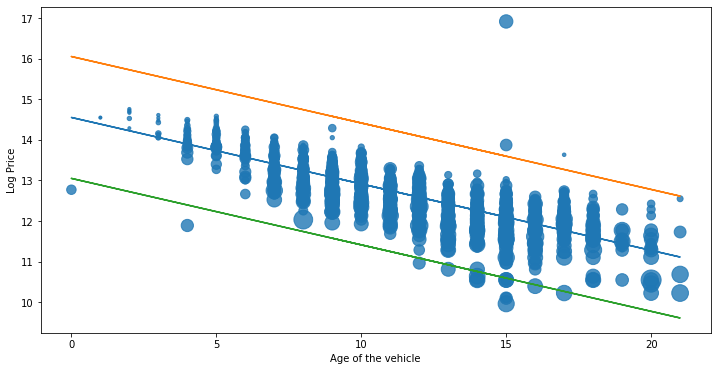

In [152]:
plt.figure(figsize=(12,6))
plt.scatter(df['year:'],df['price:'], s=df['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df['year:'], df['price:'], 1)
plt.plot(df['year:'], m*df['year:']+ b)
plt.plot(df['year:'], m*df['year:']+ b+1.5)
plt.plot(df['year:'], m*df['year:']+ b-1.5)
plt.xlabel('Age of the vehicle')
plt.ylabel('Log Price')

### Below is the delete_outliers() function implementation 

In [153]:
try:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
except:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
df_new=df
for x,y in zip(df['year:'], m*df['year:']+ b-0.5):
    left=x
    bottom=y
    multi_outliers = df_new[(df_new['price:'] <bottom) & (df_new['year:'] < left)]
    df_new=df_new[(~df_new.isin(multi_outliers) )]
for x,y in zip(df['year:'], m*df['year:']+ b+0.5):
    right=x
    top=y
    multi_outliers2 = df[(df['price:'] >top) & (df['year:'] > right) ]
    df_new=df_new[(~df_new.isin(multi_outliers2) )]


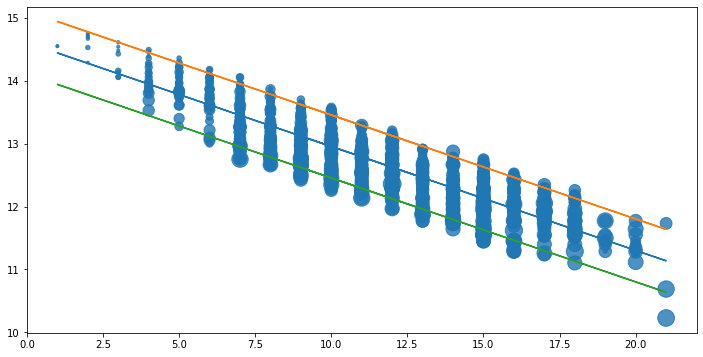

In [154]:
df_new=df_new.dropna()
plt.figure(figsize=(12,6))
plt.scatter(df_new['year:'],df_new['price:'], s=df_new['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df_new['year:'], df_new['price:'], 1)
plt.plot(df_new['year:'], m*df_new['year:']+ b)
plt.plot(df_new['year:'], m*df_new['year:']+ b+0.5)
plt.plot(df_new['year:'], m*df_new['year:']+ b-0.5)


In [13]:
#import pandas_profiling
#profile=df.profile_report()

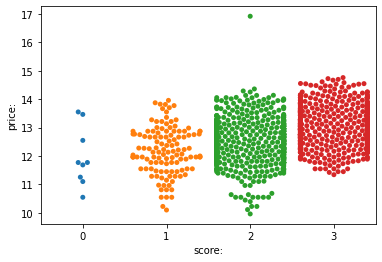

In [155]:
_=sns.swarmplot(x='score:',y='price:',data=df)


In [ ]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


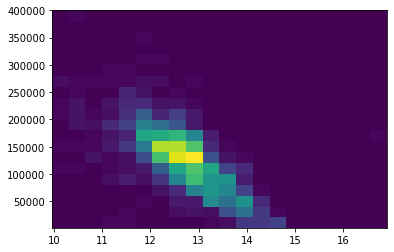

In [156]:
_=plt.hist2d(df['price:'], df['odometer:'], bins=(20,20))

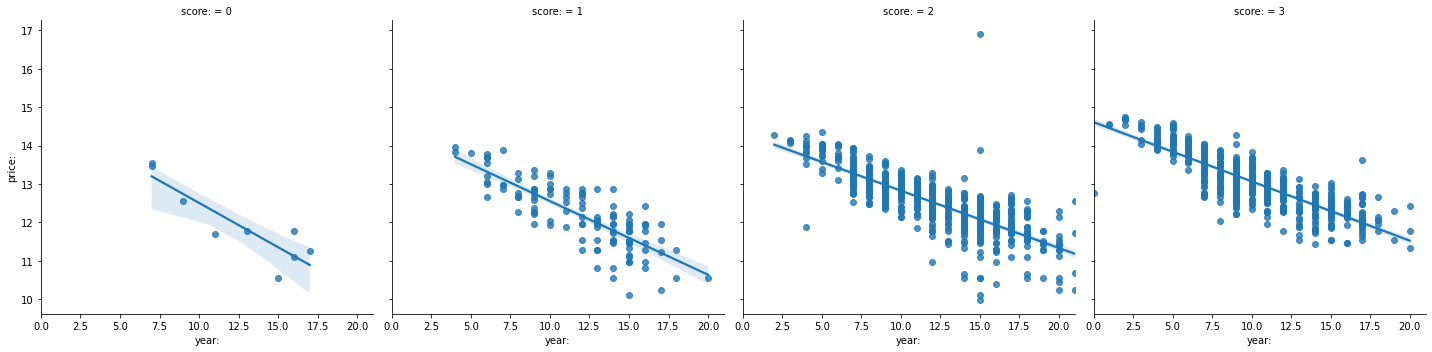

In [160]:
_=sns.lmplot(col='score:',x='year:', y='price:', data=df)

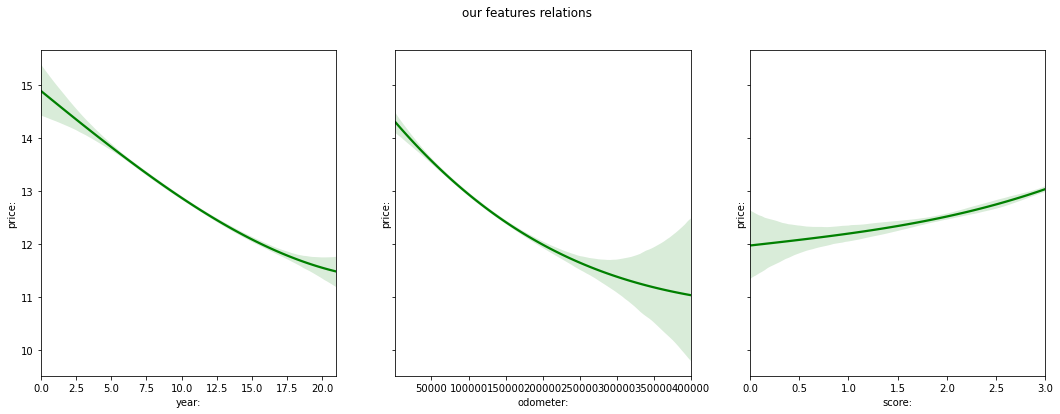

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[1],x='odometer:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[2],x='score:', y='price:', data=df, scatter=None, order=3, color='green')


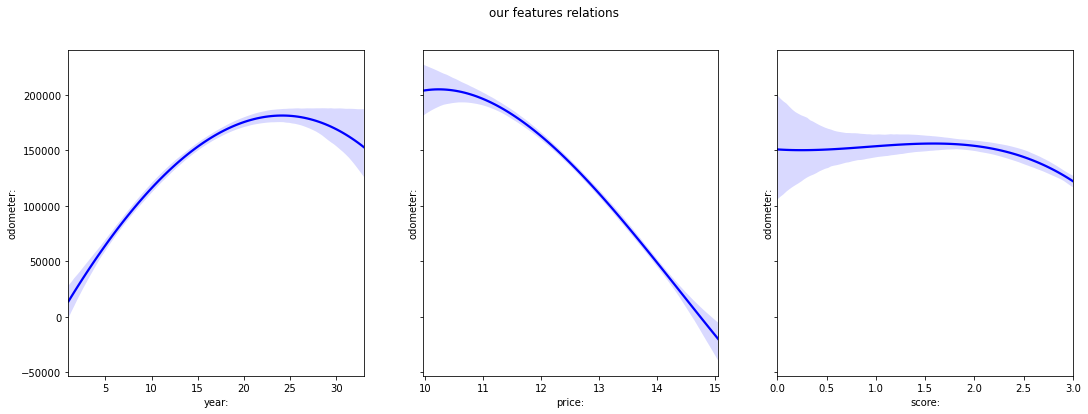

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[1],x='price:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[2],x='score:', y='odometer:', data=df, scatter=None, order=3, color='blue')


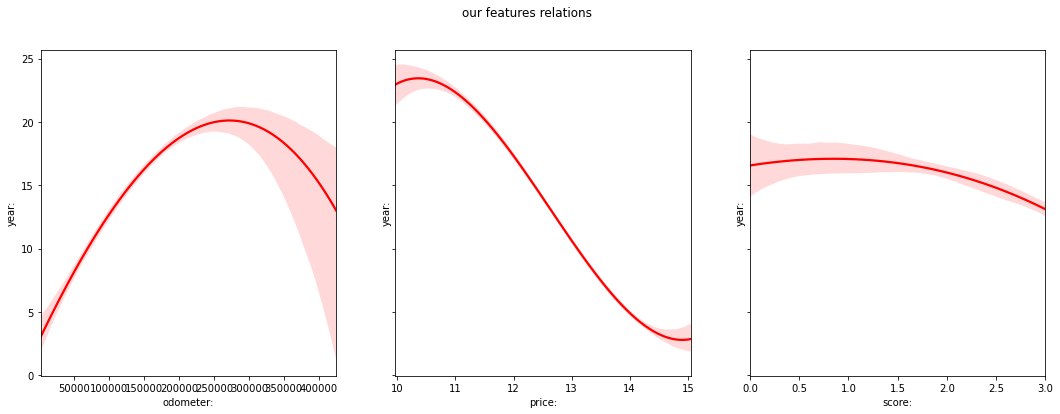

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='odometer:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[1],x='price:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[2],x='score:', y='year:', data=df, scatter=None, order=3, color='red')
